In [117]:
% matplotlib inline
import pylab as plt
import numpy as np
import networkx as nx
import pandas as pd
import operator
import os
import re
from glob import glob
import os
os.chdir('/home/jagust/dino/surf/')
import util as util
import modularity as md
from scipy import stats
from bct import *
import operator

In [118]:
matdir = '/home/jagust/dino/surf/mats/'

In [119]:
# Things to do
# Decide which fMRI scan and FDG scan to use -done
#     -Use inclusion sheet -done
#     -Use PiB that is closest to fMRI -done
# For group-level network, find the median of each edge value -done

# IMPORTANT NOTE: NEED TO REDO THE OLD PIB SUBGROUP NETWORKS -done

incl_sheet = "/home/jagust/graph/data/analysis/fdg/hub_metabolism_inclusion.xlsx"
incl = pd.ExcelFile(incl_sheet).parse("Sheet1")

In [120]:
# Need to check if inclusing sheet only has one each
incl

,Subsess,age,inclusion_fdg,inclusion_rest,reason_for_exclusion_fdg,reason_for_exclusion_rest,freesurfer_rating,max_displacement,PIB_bacs_date,FDG_bacs_date,cog_date
0,B05-201_2009-03-27,75,No,No,Max displacement > 2.0mm,Max displacement > 2.0mm,NaN,2.940035,2009-03-23,2009-03-23,2009-08-24
1,B05-201_2013-09-17,80,Yes,Yes,NaN,NaN,NaN,1.138801,2013-11-06,2013-11-06,2013-06-26
2,B05-202_2009-06-09,80,Yes,Yes,NaN,NaN,NaN,0.279321,2009-06-02,2009-06-02,2009-07-15
3,B05-202_2012-11-16,84,No,No,"Repeat, Longer time between rest and FDG","Repeat, Longer time between rest and FDG",NaN,0.554391,2009-06-02,2009-06-02,2012-09-12
4,B05-215_2008-10-01,70,Yes,Yes,NaN,NaN,NaN,0.727885,2008-10-06,2008-10-06,2009-07-09
5,B05-215_2010-09-03,72,No,No,"Repeat, Longer time between rest and FDG","Repeat, Longer time between rest and FDG",NaN,0.577282,2010-09-09,2010-09-14,2011-07-26
6,B05-216_2008-10-07,67,No,No,"Repeat, More motion during rest","Repeat, More motion during rest",NaN,1.897964,2008-11-20,2008-10-29,2009-05-18
7,B05-216_2013-08-20,71,Yes,Yes,NaN,NaN,NaN,0.489510,2013-08-15,2013-08-15,2013-06-07
8,B05-217_2009-03-16,71,No,No,"Repeat, More motion during rest","Repeat, More motion during rest",NaN,1.738105,2009-03-18,2009-03-18,2009-05-07
9,B05-217_2010-03-12,72,No,No,"Repeat, Longer time between rest and FDG","Repeat, Longer time between rest and FDG",NaN,0.546147,2009-03-18,2009-03-18,2009-05-07


234

In [125]:
# Find Subjects that are included twice
included = []
for path in func_path_incl:
    sub_id = find_id(path)
    if sub_id in included:
        print "Included Twice: " + sub_id
    else:
        included.append(sub_id)

Included Twice: B08-252
Included Twice: B10-244


In [130]:
incl[incl.Subsess == 'B08-252_2008-11-05']

,Subsess,age,inclusion_fdg,inclusion_rest,reason_for_exclusion_fdg,reason_for_exclusion_rest,freesurfer_rating,max_displacement,PIB_bacs_date,FDG_bacs_date,cog_date
96,B08-252_2008-11-05,24,No,Yes,No FDG scan,NaN,NaN,1.350622,NaT,NaT,2008-10-08


In [129]:
incl[incl.Subsess == 'B08-252_2009-08-03']

,Subsess,age,inclusion_fdg,inclusion_rest,reason_for_exclusion_fdg,reason_for_exclusion_rest,freesurfer_rating,max_displacement,PIB_bacs_date,FDG_bacs_date,cog_date
97,B08-252_2009-08-03,25,No,Yes,No FDG scan,NaN,NaN,1.042002,NaT,NaT,2008-10-08


In [134]:
incl[incl.Subsess == 'B10-244_2010-06-11']

,Subsess,age,inclusion_fdg,inclusion_rest,reason_for_exclusion_fdg,reason_for_exclusion_rest,freesurfer_rating,max_displacement,PIB_bacs_date,FDG_bacs_date,cog_date
160,B10-244_2010-06-11,23,No,Yes,No FDG scan,NaN,NaN,1.289059,NaT,NaT,2010-03-28


In [133]:
incl[incl.Subsess == 'B10-244_2012-12-06']

,Subsess,age,inclusion_fdg,inclusion_rest,reason_for_exclusion_fdg,reason_for_exclusion_rest,freesurfer_rating,max_displacement,PIB_bacs_date,FDG_bacs_date,cog_date
161,B10-244_2012-12-06,26,No,Yes,No FDG scan,NaN,NaN,1.396923,NaT,NaT,2013-01-17


In [135]:
# Ask Katie if we should remove these duplicated #

In [28]:
adjmatdir = '/home/jagust/graph/data/mri1.5/analysis/roi_networks/desikan/adjmat_gsr/%s_adjmat.npy'
func_path_incl = []
for ss in incl.Subsess:
    if incl[incl.Subsess == ss].values[0][3] == 'Yes':
        func_path_incl.append(adjmatdir % (ss))

In [122]:
# Save the list of functional mat paths that we will be using
#np.save('/home/jagust/dino/surf/inclusion_mat_paths.npy', np.array(func_path_incl))

In [30]:
# Load Subject Data
master_subject_path = "/home/jagust/dino/graph/data/mri1.5/rest/master_subject_summary.xlsx"
subject_summary = pd.ExcelFile(master_subject_path).parse("Sheet1")

subject_summary

,Subsess,LBLID,Birthday,Age,Gender,Edu,E4_Copies,MRI_Magnet,MRI_TR,MRI_Timepoints,MRI_directory,MRI_arda_dir,MRI_date,PIB_bacs_dir,PIB_bacs_date,FDG_bacs_dir,FDG_bacs_date,Cog_dir,Cog_date
0,B05-201_2009-03-27,B05-201,1933-07-14,75,F,20,1,1.5T,1.89,250,/home/jagust/graph/data/mri1.5/rest/B05-201_20...,/home/jagust/arda/lblid/B05-201/MRI_1.5_2009-0...,2009-03-27,/home/jagust/bacs_pet/PIB/old/ecat/B05-201_v1/pib,2009-03-23,/home/jagust/bacs_pet/FDG/old/ecat/B05-201_v1/fdg,2009-03-23,/home/jagust/arda/lblid/B05-201/COG_S2_2009-08...,2009-08-24
1,B05-201_2013-09-17,B05-201,1933-07-14,80,F,20,1,1.5T,2.20,185,/home/jagust/graph/data/mri1.5/rest/B05-201_20...,/home/jagust/arda/lblid/B05-201/MRI3_1.5_2013-...,2013-09-17,/home/jagust/bacs_pet/PIB/old/ecat/B05-201_v2/pib,2013-11-06,/home/jagust/bacs_pet/FDG/old/ecat/B05-201_v2/fdg,2013-11-06,/home/jagust/arda/lblid/B05-201/COG_S4_2013-06...,2013-06-26
2,B05-202_2009-06-09,B05-202,1928-07-28,80,F,17,0,1.5T,1.89,250,/home/jagust/graph/data/mri1.5/rest/B05-202_20...,/home/jagust/arda/lblid/B05-202/MRI_1.5_2009-0...,2009-06-09,/home/jagust/bacs_pet/PIB/old/ecat/B05-202_v1/pib,2009-06-02,/home/jagust/bacs_pet/FDG/old/ecat/B05-202_v1/fdg,2009-06-02,/home/jagust/arda/lblid/B05-202/COG_S2_2009-07...,2009-07-15
3,B05-202_2012-11-16,B05-202,1928-07-28,84,F,17,0,1.5T,2.20,185,/home/jagust/graph/data/mri1.5/rest/B05-202_20...,/home/jagust/arda/lblid/B05-202/MRI2_1.5_2012-...,2012-11-16,/home/jagust/bacs_pet/PIB/old/ecat/B05-202_v1/pib,2009-06-02,/home/jagust/bacs_pet/FDG/old/ecat/B05-202_v1/fdg,2009-06-02,/home/jagust/arda/lblid/B05-202/COG_S5_2012-09...,2012-09-12
4,B05-215_2008-10-01,B05-215,1938-06-21,70,F,20,2,1.5T,1.89,250,/home/jagust/graph/data/mri1.5/rest/B05-215_20...,/home/jagust/arda/lblid/B05-215/MRI_1.5_2008-1...,2008-10-01,/home/jagust/bacs_pet/PIB/old/ecat/B05-215_v1/pib,2008-10-06,/home/jagust/bacs_pet/FDG/old/ecat/B05-215_v1/fdg,2008-10-06,/home/jagust/arda/lblid/B05-215/COG_S3_2009-07...,2009-07-09
5,B05-215_2010-09-03,B05-215,1938-06-21,72,F,20,2,1.5T,2.20,185,/home/jagust/graph/data/mri1.5/rest/B05-215_20...,/home/jagust/arda/lblid/B05-215/MRI2_1.5_2010-...,2010-09-03,/home/jagust/bacs_pet/PIB/old/ecat/B05-215_v2/pib,2010-09-09,/home/jagust/bacs_pet/FDG/old/ecat/B05-215_v2/fdg,2010-09-14,/home/jagust/arda/lblid/B05-215/COG_S4_2011-07...,2011-07-26
6,B05-216_2008-10-07,B05-216,1941-09-01,67,F,18,0,1.5T,1.89,250,/home/jagust/graph/data/mri1.5/rest/B05-216_20...,/home/jagust/arda/lblid/B05-216/MRI_1.5_2008-1...,2008-10-07,/home/jagust/bacs_pet/PIB/old/ecat/B05-216_v1/pib,2008-11-20,/home/jagust/bacs_pet/FDG/old/ecat/B05-216_v1/fdg,2008-10-29,/home/jagust/arda/lblid/B05-216/COG_S3_2009-05...,2009-05-18
7,B05-216_2013-08-20,B05-216,1941-09-01,71,F,18,0,1.5T,2.20,185,/home/jagust/graph/data/mri1.5/rest/B05-216_20...,/home/jagust/arda/lblid/B05-216/MRI2_1.5_2013-...,2013-08-20,/home/jagust/bacs_pet/PIB/old/ecat/B05-216_v2/pib,2013-08-15,/home/jagust/bacs_pet/FDG/old/ecat/B05-216_v2/fdg,2013-08-15,/home/jagust/arda/lblid/B05-216/COG_S5_2013-06...,2013-06-07
8,B05-217_2009-03-16,B05-217,1937-10-10,71,M,18,0,1.5T,1.89,250,/home/jagust/graph/data/mri1.5/rest/B05-217_20...,/home/jagust/arda/lblid/B05-217/MRI_1.5_2009-0...,2009-03-16,/home/jagust/bacs_pet/PIB/old/ecat/B05-217_v1/pib,2009-03-18,/home/jagust/bacs_pet/FDG/old/ecat/B05-217_v1/fdg,2009-03-18,/home/jagust/arda/lblid/B05-217/COG_S3_2009-05...,2009-05-07
9,B05-217_2010-03-12,B05-217,1937-10-10,72,M,18,0,1.5T,2.20,185,/home/jagust/graph/data/mri1.5/rest/B05-217_20...,/home/jagust/arda/lblid/B05-217/MRI2_1.5_2010-...,2010-03-12,/home/jagust/bacs_pet/PIB/old/ecat/B05-217_v1/pib,2009-03-18,/home/jagust/bacs_pet/FDG/old/ecat/B05-217_v1/fdg,2009-03-18,/home/jagust/arda/lblid/B05-217/COG_S3_2009-05...,2009-05-07


In [31]:
# Load Subject Data
pib_summary = "/home/jagust/dino/surf/pib_summary_dates.xls"
pib_dates = pd.ExcelFile(pib_summary).parse("Sheet5")
pib_dates

,SubjID,BAC#,Visit,Age,date,Scanner,PIB Index,Notes,Due For Retesting,Elligble for follow-up at next date?,Follow-Up Notes
0,B05-201,BAC218,1,75,2009-03-23,Ecat,1.573979,NaN,2013-08-01 00:00:00,Yes,NaN
1,B05-202,BAC224,1,80,2009-06-02,Ecat,1.083508,NaN,2013-09-01 00:00:00,Yes,NaN
2,B05-215,BAC008,1,70,2008-10-06,Ecat,1.613493,NaN,2013-07-01 00:00:00,No,Already did visit 2
3,B05-216,BAC001,1,67,2008-11-20,Ecat,1.044985,NaN,2013-05-01 00:00:00,Yes,NaN
4,B05-217,BAC019,1,71,2009-03-18,Ecat,1.021653,NaN,2013-05-01 00:00:00,Yes,NaN
5,B05-229,BAC010,1,71,2005-10-31,Ecat,1.051961,NaN,2013-10-01 00:00:00,Yes,NaN
6,B05-231,BAC038,1,61,2005-11-21,Ecat,1.079543,NaN,2013-05-01 00:00:00,Yes,Will be Aged 69
7,B05-232,BAC016,1,62,2005-11-28,Ecat,0.999170,NaN,2013-10-01 00:00:00,No,Already did visit 2
8,B06-202,BAC076,1,71,2009-03-23,Ecat,1.033065,NaN,2013-04-01 00:00:00,No,Already did visit 2
9,B06-203,BAC071,1,67,2009-04-08,Ecat,1.026644,NaN,2014-05-01 00:00:00,No,Already did visit 2


In [32]:
pib_dates.date.values[0] == np.datetime64(incl.PIB_bacs_date[0])

True

In [33]:
np.datetime64(incl.PIB_bacs_date[0])

numpy.datetime64('2009-03-22T17:00:00.000000-0700')

In [34]:
# Importing PiB Subject x Roi Data
pib_path = "/home/jagust/dino/graph/data/spreadsheets/pib/pib_summary_April2015.csv"
pib_dat = np.genfromtxt(pib_path, dtype = None)
pib_df = pd.DataFrame(pib_dat[1:], columns = pib_dat[0,:])
pib_df

,SUBID,scanner,ALL,Left-Amygdala,Left-Caudate,Left-Cerebellum-Cortex,Left-Hippocampus,Left-Pallidum,Left-Putamen,Left-Thalamus-Proper,...,ctx-rh-precentral,ctx-rh-precuneus,ctx-rh-rostralanteriorcingulate,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-temporalpole,ctx-rh-transversetemporal
0,B05-201_v1,ecat,1.273208,1.086826,1.30695,0.914772,1.10575,1.485336,1.520339,1.438444,...,1.261181,1.678135,1.815939,1.585188,1.449524,1.305483,1.19165,1.427792,0.971381,1.427594
1,B05-201_v2,ecat,1.529529,1.262077,1.471517,1.007894,1.250078,1.762007,1.84082,1.644838,...,1.527978,1.896365,1.982312,1.949927,1.694613,1.550804,1.546884,1.80008,1.180847,1.722326
2,B05-202_v1,ecat,1.007444,0.996752,1.009585,0.925908,1.059822,1.432898,1.297446,1.411028,...,1.032836,1.068713,1.126808,0.943386,1.051736,1.005358,0.990789,1.001359,0.866243,1.216935
3,B05-215_v1,ecat,1.30598,1.127267,1.381074,0.942477,1.12963,1.582226,1.656856,1.536823,...,1.236287,1.516453,1.65888,1.654284,1.547849,1.320834,1.278834,1.478342,0.979637,1.422982
4,B05-215_v2,ecat,1.264717,1.147965,1.253538,0.95681,1.092281,1.621212,1.61515,1.485623,...,1.230727,1.265551,1.608417,1.601515,1.397909,1.113494,1.333598,1.406201,1.047203,1.470536
5,B05-216_v1,ecat,0.995555,1.023762,1.157034,0.94195,1.049361,1.231373,1.263895,1.337227,...,1.074021,1.043423,0.866399,0.91353,0.977341,1.025745,0.953268,1.010699,0.778639,0.98168
6,B05-216_v2,ecat,0.997904,1.150004,1.202634,0.945866,1.13584,1.311408,1.310684,1.524631,...,1.036295,0.997476,1.002954,0.933247,0.936901,1.003824,0.96584,0.927819,0.932658,0.983451
7,B05-217_v1,ecat,0.969352,1.028224,0.942836,0.936708,1.043872,1.284137,1.225581,1.307024,...,1.044124,0.999279,0.960506,0.883778,0.939117,0.955872,0.911645,0.93609,0.769666,1.090629
8,B05-217_v2,ecat,0.991589,0.989056,0.947241,1.051914,1.006267,1.297097,1.218044,1.368012,...,1.059234,0.992348,0.996284,0.911932,0.980789,0.997719,0.911317,0.95865,0.821811,1.095473
9,B05-229_v1,ecat,0.9856,0.983856,0.839358,0.882943,1.037109,1.137595,1.157793,0.999583,...,1.021045,1.107521,0.883888,0.968344,0.960292,1.004711,0.942215,0.917178,0.829615,1.04856


In [35]:
# Get PiB Values and Construct Correlation Matrix
pib_vals = pd.DataFrame(np.array(pib_df.values[:, 3:], dtype = float))
corr_mat = np.array(pib_vals.corr())
np.fill_diagonal(corr_mat, 0.0)
corr_mat

array([[ 0.        ,  0.62742124,  0.14107674, ...,  0.54433657,
         0.55844704,  0.56966236],
       [ 0.62742124,  0.        ,  0.14770853, ...,  0.72515725,
         0.55865214,  0.70237077],
       [ 0.14107674,  0.14770853,  0.        , ...,  0.11018073,
         0.25164088,  0.15376092],
       ..., 
       [ 0.54433657,  0.72515725,  0.11018073, ...,  0.        ,
         0.59428415,  0.82330786],
       [ 0.55844704,  0.55865214,  0.25164088, ...,  0.59428415,
         0.        ,  0.60851925],
       [ 0.56966236,  0.70237077,  0.15376092, ...,  0.82330786,
         0.60851925,  0.        ]])

In [190]:
pos_pib_mat, neg_pib_mat = np.zeros(80), np.zeros(80)
for ss in incl.Subsess:
    if incl[incl.Subsess == ss].values[0][3] == 'Yes':
        subid = find_id(ss)
        try:
            dt = np.datetime64(incl[incl.Subsess == ss].values[0][8])
        except:
            continue
        subid_vis_row = pib_dates[pib_dates.date == dt]
        vis = '_v' + str(subid_vis_row.Visit.values[0])
        ind = subid + vis
        pib_df_row = pib_df[pib_df.SUBID == ind]
        if len(pib_df_row.values) > 0:
            vals = pib_df_row.values[0][3:]
        if len(pib_df_row.values) == 0:
            print "no PiB df vals"
            continue
        if subid in geno_pos:
            pos_pib_mat = np.vstack((pos_pib_mat, vals))
        if subid in geno_neg:
            neg_pib_mat = np.vstack((neg_pib_mat, vals))

pos_pib_mat = pos_pib_mat[1:,:]
neg_pib_mat = neg_pib_mat[1:,:]

no PiB df vals
no PiB df vals
no PiB df vals
no PiB df vals
no PiB df vals
no PiB df vals
no PiB df vals
no PiB df vals
no PiB df vals


In [104]:
pos_pib_vals = pd.DataFrame(pos_pib_mat, dtype = float)
pos_corr_mat = np.array(pos_pib_vals.corr())
np.fill_diagonal(pos_corr_mat, 0.0)
pos_corr_mat

array([[ 0.        ,  0.77943367,  0.22775548, ...,  0.73325972,
         0.76247036,  0.72276186],
       [ 0.77943367,  0.        ,  0.21345622, ...,  0.84633672,
         0.64863501,  0.80458743],
       [ 0.22775548,  0.21345622,  0.        , ...,  0.26177252,
         0.37729213,  0.28303832],
       ..., 
       [ 0.73325972,  0.84633672,  0.26177252, ...,  0.        ,
         0.69120784,  0.87140062],
       [ 0.76247036,  0.64863501,  0.37729213, ...,  0.69120784,
         0.        ,  0.61590102],
       [ 0.72276186,  0.80458743,  0.28303832, ...,  0.87140062,
         0.61590102,  0.        ]])

In [98]:
#np.save('/home/jagust/dino/surf/mats/pos_pib_mat.npy', pos_corr_mat)

In [102]:
#print neg_pib_mat.shape
neg_pib_vals = pd.DataFrame(neg_pib_mat, dtype = float)
neg_corr_mat = np.array(neg_pib_vals.corr())
np.fill_diagonal(neg_corr_mat, 0.0)
neg_corr_mat

array([[ 0.        ,  0.6553251 ,  0.19198673, ...,  0.54528687,
         0.51799196,  0.57349803],
       [ 0.6553251 ,  0.        ,  0.21937086, ...,  0.6877399 ,
         0.52344731,  0.67658298],
       [ 0.19198673,  0.21937086,  0.        , ...,  0.15527266,
         0.26263761,  0.20465526],
       ..., 
       [ 0.54528687,  0.6877399 ,  0.15527266, ...,  0.        ,
         0.63283098,  0.73200373],
       [ 0.51799196,  0.52344731,  0.26263761, ...,  0.63283098,
         0.        ,  0.60467338],
       [ 0.57349803,  0.67658298,  0.20465526, ...,  0.73200373,
         0.60467338,  0.        ]])

In [101]:
#np.save('/home/jagust/dino/surf/mats/neg_pib_mat.npy', neg_corr_mat)

In [70]:
def median(l):
    return np.median(np.array(l))

In [183]:
# Make Set that has IDs and Subsesses of all PiB Positive
geno_pos = set([])
geno_neg = set([])
for ss in subject_summary.Subsess:
    if is_geno_pos(ss):
        geno_pos.add(str(ss))
        geno_pos.add(str(find_id(ss)))
    if not is_geno_pos(ss):
        geno_neg.add(str(ss))
        geno_neg.add(str(find_id(ss)))

No genotype data: B07-218
No genotype data: B07-218
No genotype data: B07-251
No genotype data: B07-251
No genotype data: B07-267
No genotype data: B07-267
No genotype data: B07-271
No genotype data: B07-271
No genotype data: B07-274
No genotype data: B07-274
No genotype data: B07-275
No genotype data: B07-275
No genotype data: B08-252
No genotype data: B08-252
No genotype data: B08-252
No genotype data: B08-252
No genotype data: B09-206
No genotype data: B09-206
No genotype data: B09-280
No genotype data: B09-280
No genotype data: B10-202
No genotype data: B10-202
No genotype data: B10-215
No genotype data: B10-215
No genotype data: B10-216
No genotype data: B10-216
No genotype data: B10-232
No genotype data: B10-232
No genotype data: B10-257
No genotype data: B10-257
No genotype data: B10-261
No genotype data: B10-261
No genotype data: B10-264
No genotype data: B10-264
No genotype data: B10-294
No genotype data: B10-294
No genotype data: B11-204
No genotype data: B11-204
No genotype 

In [188]:
genotype_negative = np.array(list(geno_neg))
genotype_positive = np.array(list(geno_pos))
np.save('/home/jagust/dino/surf/geno_neg.npy', genotype_negative)
np.save('/home/jagust/dino/surf/geno_pos.npy', genotype_positive)

In [123]:
# Importing Functions
def find_id(s):
    inds = re.search('B[0,1]\d-\d\d\d', s)
    if inds is None:
        print 'Subject ID not found'
        return None
    else:
        inds = inds.span()
        return s[inds[0]: inds[1]]
    
def get_subsess(path):
    direc = "/home/jagust/graph/data/mri1.5/analysis/roi_networks/desikan/adjmat_gsr/"
    ind1 = len(direc)
    ind2 = ind1 + 18
    return path[ind1:ind2]

def is_geno_pos(ss):
    if len(ss) > 7:
        num_copies = subject_summary[subject_summary.Subsess == ss].values[0][6]
        if num_copies not in [0, 1, 2]:
            print "No genotype data: " + find_id(ss)
            return
        else:
            return num_copies > 0.0
    else:
        num_copies = subject_summary[subject_summary.LBLID == ss].values[0][6]
        if num_copies not in [0, 1, 2]:
            print "No genotype data: " + find_id(ss)
            return
        else:
            return num_copies > 0.0

In [38]:
#group_mat
#np.save('/home/jagust/dino/surf/mats/group_mat_med.npy', group_mat)

Create E4 Positive Functional Matrix (Median-based)
==

In [36]:
pos_group_mat = np.zeros((80, 80))
for r in range(80):
    print r
    for c in range(80)[r:80]:
        pos_vals = []
        neg_vals = []
        for p in func_path_incl:
            ss = get_subsess(p)
            if ss in geno_pos:
                mat = np.load(p)
                pos_vals.append(mat[r][c])
        pos_vals = sorted(pos_vals)
        pos_group_mat[r][c] = median(pos_vals)

In [14]:
pos_group_mat

array([[ 1.        ,  0.1621029 , -0.10572812, ..., -0.04870278,
        -0.0503292 , -0.07715148],
       [ 0.        ,  1.        ,  0.19003185, ...,  0.00556062,
         0.01270085,  0.0052738 ],
       [ 0.        ,  0.        ,  1.        , ..., -0.0944102 ,
         0.00231949, -0.12908704],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.05330828,  0.0748268 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.1869074 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

Create E4 Negative Functional Matrix (Median-based)
==

In [35]:
neg_group_mat = np.zeros((80, 80))
for r in range(80):
    if r % 5 == 0:
        print r
    for c in range(80)[r:80]:
        neg_vals = []
        for p in func_path_incl:
            ss = get_subsess(p)
            if ss in geno_pos:
                continue
            else:
                mat = np.load(p)
                neg_vals.append(mat[r][c])
        neg_vals = sorted(neg_vals)
        neg_group_mat[r][c] = median(neg_vals)

In [20]:
neg_group_mat

array([[  1.00000000e+00,   8.24374640e-02,  -1.00500832e-01, ...,
         -1.41394428e-02,  -9.77715690e-02,  -1.48384524e-01],
       [  0.00000000e+00,   1.00000000e+00,   1.64892629e-01, ...,
          6.66117576e-04,   1.63203295e-02,   3.30161051e-02],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00, ...,
         -6.65553151e-02,  -9.81940051e-03,  -8.82642569e-02],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   7.61861231e-02,   1.48889419e-01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   1.00000000e+00,   2.49043650e-01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

Save Median-Based Weighted Functional Matrices
==

In [21]:
#np.save('/home/jagust/dino/surf/mats/neg_group_mat_med.npy', neg_group_mat)
#np.save('/home/jagust/dino/surf/mats/pos_group_mat_med.npy', pos_group_mat)

In [71]:
G = nx.Graph(group_mat)
# Remove Self Edges
for n in range(80):
    G.remove_edge(n, n)

Create PiB Network and add Distance Attributes
==

In [67]:
# Import Matrices
pibmatpos = np.load('/home/jagust/dino/surf/mats/pos_pib_mat.npy')
pibmatneg = np.load('/home/jagust/dino/surf/mats/neg_pib_mat.npy')

In [68]:
# Note - 7/13 - These matrices were created using all of the PiB data; Need to go back and do it only for
# PiB scans that are closest to the functional networks that we will be using

In [69]:
# Construct Graphs
pibnetpos = nx.Graph(pibmatpos)
pibnetneg = nx.Graph(pibmatneg)

In [70]:
# Add distance attribute
pos_edges = pibnetpos.edges(data = True)
neg_edges = pibnetneg.edges(data = True)
for e in pos_edges:
    e[2]['distance'] = 1.0 - e[2]['weight']
for e in neg_edges:
    e[2]['distance'] = 1.0 - e[2]['weight']


Run Simulation (Measure only efficiency and total degree for now)
==

Create Functional Networks
==

In [137]:
func_mat_pos = np.load('/home/jagust/dino/surf/mats/pos_group_mat_med.npy')
func_mat_neg = np.load('/home/jagust/dino/surf/mats/neg_group_mat_med.npy')

func_net_pos = nx.Graph(func_mat_pos)
func_net_neg = nx.Graph(func_mat_neg)


# Null Models
copy_tri(func_mat_pos)
copy_tri(func_mat_neg)

func_mat_pos_null, rp = null_model_und_sign(func_mat_pos)
func_mat_neg_null, rn = null_model_und_sign(func_mat_neg)

func_net_pos_null = nx.Graph(func_mat_pos_null)
func_net_neg_null = nx.Graph(func_mat_neg_null)


# # Remove Self Edges
for n in range(80):
    func_net_pos.remove_edge(n, n)
    func_net_neg.remove_edge(n, n)
    if (n, n) in func_net_pos_null.edges():
        func_net_pos_null.remove_edge(n, n)
    if (n, n) in func_net_neg_null.edges():
        func_net_neg_null.remove_edge(n, n)

# # Add distance attributes
pos_edges = func_net_pos.edges(data = True)
neg_edges = func_net_neg.edges(data = True)
for e in pos_edges:
    e[2]['distance'] = 1.0 - e[2]['weight']
for e in neg_edges:
    e[2]['distance'] = 1.0 - e[2]['weight']
    
add_distance_attr(func_net_pos_null)
add_distance_attr(func_net_neg_null)

In [138]:
def sort_by_val(d):
    ''' Sort a dictionary by value
    
    Parameters
    ----------
    d : a dictionary
    
    Returns
    -------
    l : a list of key-value pairs in tuples 
    '''
    l = sorted(d.items(), key = operator.itemgetter(1))
    return l

In [139]:
# Find Seed for PiB Networks
pos_seed = sort_by_val(pibnetpos.degree(weight='weight'))[-1][0]
neg_seed = sort_by_val(pibnetneg.degree(weight='weight'))[-1][0]
print pos_seed, neg_seed

55 41


In [149]:
epos_first_sim, dpos_first_sim = run_simulation(func_net_pos.copy(), pibnetpos, pos_seed, 70)
eneg_first_sim, dneg_first_sim = run_simulation(func_net_neg.copy(), pibnetneg, neg_seed, 70)
eposnull_first_sim, dposnull_first_sim = run_simulation(func_net_pos_null.copy(), pibnetpos, pos_seed, 70)
enegnull_first_sim, dnegnull_first_sim = run_simulation(func_net_neg_null.copy(), pibnetneg, neg_seed, 70)

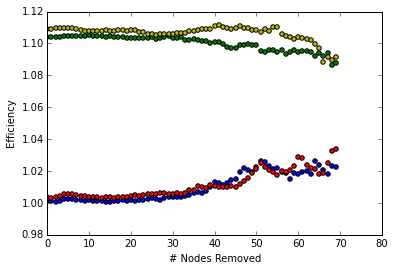

In [166]:
# Plot Efficiencies
fig = plt.figure()
ax = fig.add_subplot(111)


ax.scatter(range(len(epos_first_sim)), epos_first_sim, c = 'b')
ax.scatter(range(len(eneg_first_sim)), eneg_first_sim, c = 'r')
ax.scatter(range(len(eposnull_first_sim)), eposnull_first_sim, c = 'g')
ax.scatter(range(len(enegnull_first_sim)), enegnull_first_sim, c = 'y')
#ax.scatter(range(len(enull)), enull, c = 'g')
plt.xlim(0, 80)
plt.xlabel('# Nodes Removed')
plt.ylabel('Efficiency')

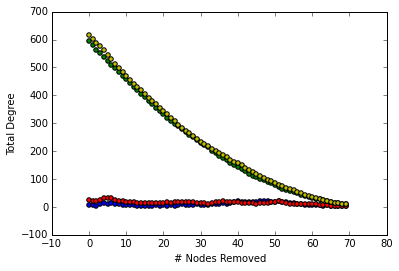

In [167]:
# Plot Degrees
fig = plt.figure()
ax = fig.add_subplot(111)


ax.scatter(range(len(dpos_first_sim)), dpos_first_sim, c = 'b')
ax.scatter(range(len(dneg_first_sim)), dneg_first_sim, c = 'r')
ax.scatter(range(len(dposnull_first_sim)), dposnull_first_sim, c = 'g')
ax.scatter(range(len(dnegnull_first_sim)), dnegnull_first_sim, c = 'y')
plt.xlabel('# Nodes Removed')
plt.ylabel('Total Degree')

These results are a little unusual probably due to the presence of many negative edge weights. I will now try to run the simulation on functional networks with only positive edge weights.

In [63]:
neg_func_mat = np.load('/home/jagust/dino/surf/mats/neg_group_mat_med.npy')
pos_func_mat = np.load('/home/jagust/dino/surf/mats/pos_group_mat_med.npy')

func_net_neg = nx.Graph(neg_func_mat)
func_net_pos = nx.Graph(pos_func_mat)

Re-run Simulation on Functional Nets with only Positive Edge Weights
==

In [143]:
# Remove Edges With Negative Weight
for e in func_net_neg.edges(data=True):
    if e[2]['weight'] < 0.0:
        func_net_neg.remove_edge(e[0], e[1])

for e in func_net_pos.edges(data=True):
    if e[2]['weight'] < 0.0:
        func_net_pos.remove_edge(e[0], e[1])
        
def remove_neg_weight(g):
    for e in g.edges(data=True):
        if e[2]['weight'] < 0.0:
            g.remove_edge(e[0], e[1])

In [144]:
remove_neg_weight(func_net_neg_null)
remove_neg_weight(func_net_neg_null)

In [145]:
# Add 'Distance' Attribute'
add_distance_attr(func_net_neg)
add_distance_attr(func_net_pos)
add_distance_attr(func_net_neg_null)
add_distance_attr(func_net_pos_null)

In [180]:
epos_sec_sim, dpos_sec_sim = run_simulation(func_net_pos.copy(), pibnetpos, pos_seed, 70)
eneg_sec_sim, dneg_sec_sim = run_simulation(func_net_neg.copy(), pibnetneg, neg_seed, 70)
eposnull_sec_sim, dposnull_sec_sim = run_simulation(func_net_pos_null.copy(), pibnetpos, pos_seed, 70)
enegnull_sec_sim, dnegnull_sec_sim = run_simulation(func_net_neg_null.copy(), pibnetneg, neg_seed, 70)

In [152]:
print find_eff(func_net_pos_null.copy())
G = func_net_pos_null.copy()
G.remove_node(55)
print find_eff(G)

1.10412297387
1.10472636249


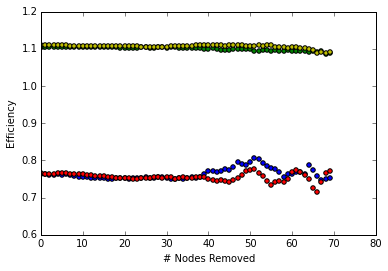

In [179]:
# Plot Efficiency
fig = plt.figure()
ax = fig.add_subplot(111)


ax.scatter(range(len(epos_sec_sim)), epos_sec_sim, c = 'b')
ax.scatter(range(len(eneg_sec_sim)), eneg_sec_sim, c = 'r')
ax.scatter(range(len(eposnull_sec_sim)), eposnull_sec_sim, c = 'g')
ax.scatter(range(len(enegnull_sec_sim)), enegnull_sec_sim, c = 'y')
plt.xlim(0, 80)
plt.xlabel('# Nodes Removed')
plt.ylabel('Efficiency')

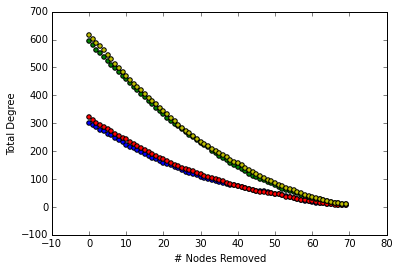

In [170]:
# Plot Degrees
fig = plt.figure()
ax = fig.add_subplot(111)


ax.scatter(range(len(dpos_sec_sim)), dpos_sec_sim, c = 'b')
ax.scatter(range(len(dneg_sec_sim)), dneg_sec_sim, c = 'r')
ax.scatter(range(len(dposnull_sec_sim)), dposnull_sec_sim, c = 'g')
ax.scatter(range(len(dnegnull_sec_sim)), dnegnull_sec_sim, c = 'y')
plt.xlabel('# Nodes Removed')
plt.ylabel('Total Degree')

In [153]:
def find_next_node(r, g):
    """ Find the next node to be removed in the simulation
    
    Parameters
    ----------
        r : set of removed nodes
        
    Returns
    -------
        node : next node to be removed
    """
    nodes = g.nodes()
    distance = {}
    for node in nodes:
        if node in r:
            continue
        distance[node] = 0.0
        for removed in r:
            distance[node] += nx.shortest_path_length(g, node, removed, 'distance') 
        sorted_distances = sort_by_val(distance)
    return sorted_distances[0][0]

import sys
def find_eff(g):
    ''' Finds the efficiency of a network
    Parameters
    ----------
    g : A binary weighted graph
    
    Returns
    -------
    eff : Efficiency
    
    Notes:
        -If the graph is connected, returns 1.0 / average shortest path length
        -Otherwise, returns 1.0 / weighted average of average shortest path length of graph subcomponents
    
    '''
    if nx.is_connected(g):
        return 1.0 / nx.average_shortest_path_length(g, weight='distance')
    else:
        short_paths, poss_paths = [], []
        total_paths, avg_short_path = 0.0, 0.0
        if len(g.edges()) == 0:
            return 1.0 / sys.float_info.max
        for subg in nx.connected_component_subgraphs(g):
            n = len(subg.nodes())
            if n == 1:
                continue
            num_paths = n * (n - 1) * 1.0 / 2.0
            total_paths += num_paths
            short_paths.append(nx.average_shortest_path_length(subg, weight='distance') * 1.0)
            poss_paths.append(num_paths * 1.0)
        for ind in range(len(short_paths)):
            avg_short_path += short_paths[ind] * (poss_paths[ind] / total_paths)
        return 1.0 / avg_short_path

def run_simulation(fnet, pnet, seed, stop):
    ''' Run lesion simulation
    Parameters
    ----------
    fnet : functional network
    pnet : PiB correlation network
    seed : beginning of simulated lesioning
    stop : terminate simulation after removing stop number of nodes
    
    Returns
    -------
    effs : tracks efficiencies of functional network as nodes are removed
    degs : tracks total degrees of functional network as nodes are removed
    
    Notes:
        -Efficiency is defined as the inverse of the average shortest path length
            of the functional network
    '''
    
    # Initial global metrics
    effs, degs = [], []
    effs.append(find_eff(fnet))
    degs.append(sum(fnet.degree(weight='weight').values()))
    
    removed = {seed}
    while len(removed) < stop:
        print len(removed)
        rem = find_next_node(removed, pnet)
        removed.add(rem)
        fnet.remove_edges_from(fnet.edges(rem))
        
        effs.append(find_eff(fnet))
        degs.append(sum(fnet.degree(weight='weight').values()))
    
    return effs, degs

Null Model Testing
==

In [154]:
corr_mat = np.load(matdir + 'neg_group_mat_med.npy')
corr_mat

array([[  1.00000000e+00,   8.24374640e-02,  -1.00500832e-01, ...,
         -1.41394428e-02,  -9.77715690e-02,  -1.48384524e-01],
       [  0.00000000e+00,   1.00000000e+00,   1.64892629e-01, ...,
          6.66117576e-04,   1.63203295e-02,   3.30161051e-02],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00, ...,
         -6.65553151e-02,  -9.81940051e-03,  -8.82642569e-02],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   7.61861231e-02,   1.48889419e-01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   1.00000000e+00,   2.49043650e-01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

In [155]:
def copy_tri(corr_mat):
    for r in range(80):
        for c in range(80)[0:r]:
            corr_mat[r][c] = corr_mat[c][r]

In [158]:
copy_tri(corr_mat)
corr_mat

array([[  1.00000000e+00,   8.24374640e-02,  -1.00500832e-01, ...,
         -1.41394428e-02,  -9.77715690e-02,  -1.48384524e-01],
       [  8.24374640e-02,   1.00000000e+00,   1.64892629e-01, ...,
          6.66117576e-04,   1.63203295e-02,   3.30161051e-02],
       [ -1.00500832e-01,   1.64892629e-01,   1.00000000e+00, ...,
         -6.65553151e-02,  -9.81940051e-03,  -8.82642569e-02],
       ..., 
       [ -1.41394428e-02,   6.66117576e-04,  -6.65553151e-02, ...,
          1.00000000e+00,   7.61861231e-02,   1.48889419e-01],
       [ -9.77715690e-02,   1.63203295e-02,  -9.81940051e-03, ...,
          7.61861231e-02,   1.00000000e+00,   2.49043650e-01],
       [ -1.48384524e-01,   3.30161051e-02,  -8.82642569e-02, ...,
          1.48889419e-01,   2.49043650e-01,   1.00000000e+00]])

In [159]:
rand_corr_mat, r = null_model_und_sign(corr_mat)

In [160]:
rand_corr_mat

array([[ 0.        ,  0.07255422,  0.00425969, ...,  0.20951018,
         0.15327854,  0.33614193],
       [ 0.07255422,  0.        ,  0.01510504, ...,  0.1374051 ,
         0.05073298,  0.08101853],
       [ 0.00425969,  0.01510504,  0.        , ...,  0.06211171,
         0.01208168,  0.02931823],
       ..., 
       [ 0.20951018,  0.1374051 ,  0.06211171, ...,  0.        ,
         0.01375342,  0.12556636],
       [ 0.15327854,  0.05073298,  0.01208168, ...,  0.01375342,
         0.        ,  0.2012592 ],
       [ 0.33614193,  0.08101853,  0.02931823, ...,  0.12556636,
         0.2012592 ,  0.        ]])

In [161]:
def add_distance_attr(g):
    ''' Add a distance attribute to graph edges
    Parameters
    -----------
    g : A weighted undirected graph
    
    Returns
    -------
    None
    
    '''
    for edge in g.edges(data=True):
        edge[2]['distance'] = 1.0 - edge[2]['weight']

In [162]:
G = nx.Graph(corr_mat)
randG = nx.Graph(corr_mat)
add_distance_attr(randG)
add_distance_attr(G)

(array([  2.,   2.,   0.,   1.,   4.,  11.,  16.,  20.,  13.,  11.]),
 array([-1.63461732, -1.06756334, -0.50050935,  0.06654463,  0.63359862,
         1.2006526 ,  1.76770659,  2.33476057,  2.90181456,  3.46886855,
         4.03592253]),
 <a list of 10 Patch objects>)

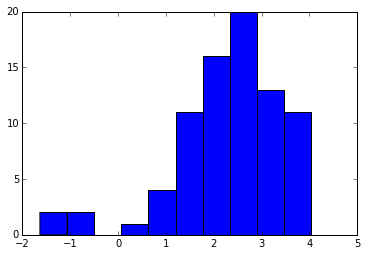

In [163]:
plt.hist(G.degree(weight='weight').values())

(array([  2.,   2.,   0.,   1.,   4.,  11.,  16.,  20.,  13.,  11.]),
 array([-1.63461732, -1.06756334, -0.50050935,  0.06654463,  0.63359862,
         1.2006526 ,  1.76770659,  2.33476057,  2.90181456,  3.46886855,
         4.03592253]),
 <a list of 10 Patch objects>)

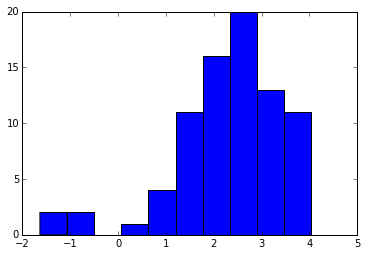

In [164]:
plt.hist(randG.degree(weight='weight').values())

In [54]:
pibmat = np.load(matdir + 'neg_pib_mat.npy')
pibnet = nx.Graph(pibmat)

In [59]:
enegnull, dnegnull = run_simulation(randG.copy(), pibnet.copy(), 41, 70)

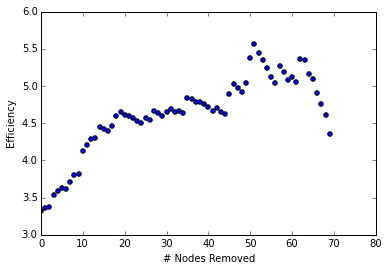

In [56]:
# Plot Efficiency
fig = plt.figure()
ax = fig.add_subplot(111)


ax.scatter(range(len(enegnull)), enegnull, c = 'b')
plt.xlim(0, 80)
plt.xlabel('# Nodes Removed')
plt.ylabel('Efficiency')

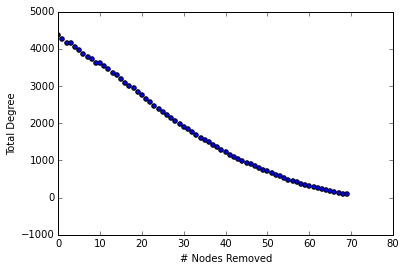

In [57]:
# Plot Degrees
fig = plt.figure()
ax = fig.add_subplot(111)


ax.scatter(range(len(dnegnull)), dnegnull, c = 'b')
plt.xlim(0, 80)
plt.xlabel('# Nodes Removed')
plt.ylabel('Total Degree')

In [171]:
def run_rand_removal_simulation(fnet, stop):
    ''' Run lesion simulation removing nodes in random order
    Parameters
    ----------
    fnet : functional network
    seed : beginning of simulated lesioning
    stop : terminate simulation after removing stop number of nodes
    
    Returns
    -------
    effs : tracks efficiencies of functional network as nodes are removed
    degs : tracks total degrees of functional network as nodes are removed
    
    Notes:
        -Efficiency is defined as the inverse of the average shortest path length
            of the functional network
    '''
    
    # Initial global metrics
    effs, degs = [], []
    effs.append(find_eff(fnet))
    degs.append(sum(fnet.degree(weight='weight').values()))
    
    nodes = range(80)
    random.shuffle(nodes) 
    seed = nodes.pop(0)
    
    # Find first node
    removed = {seed}
    
    
    while len(removed) < stop:
        
        print len(removed)
        random.shuffle(nodes)
        rem = nodes.pop(0)
        removed.add(rem)
        fnet.remove_edges_from(fnet.edges(rem))
        
        effs.append(find_eff(fnet))
        degs.append(sum(fnet.degree(weight='weight').values()))
    
    return effs, degs

In [175]:
# eneg_rand_rem, dneg_rand_rem = run_rand_removal_simulation(func_net_neg.copy(), 70)
# epos_rand_rem, dpos_rand_rem = run_rand_removal_simulation(func_net_pos.copy(), 70)
# enegnull_rand_rem, dnegnull_rand_rem = run_rand_removal_simulation(func_net_neg_null.copy(), 70)
# eposnull_rand_rem, dposnull_rand_rem = run_rand_removal_simulation(func_net_pos_null.copy(), 70)

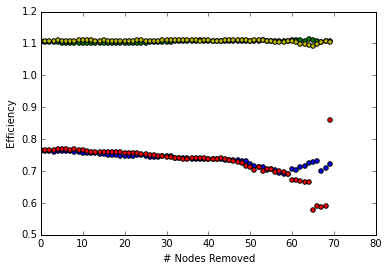

In [178]:
# Plot Efficiency
fig = plt.figure()
ax = fig.add_subplot(111)


ax.scatter(range(len(epos_rand_rem)), epos_rand_rem, c = 'b')
ax.scatter(range(len(eneg_rand_rem)), eneg_rand_rem, c = 'r')
ax.scatter(range(len(eposnull_rand_rem)), eposnull_rand_rem, c = 'g')
ax.scatter(range(len(enegnull_rand_rem)), enegnull_rand_rem, c = 'y')
plt.xlim(0, 80)
plt.xlabel('# Nodes Removed')
plt.ylabel('Efficiency')

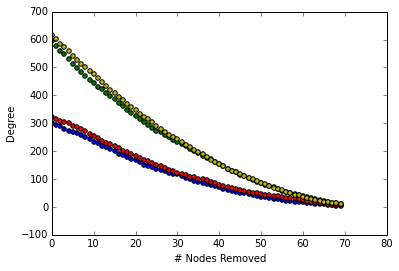

In [177]:
# Plot Efficiency
fig = plt.figure()
ax = fig.add_subplot(111)


ax.scatter(range(len(dpos_rand_rem)), dpos_rand_rem, c = 'b')
ax.scatter(range(len(dneg_rand_rem)), dneg_rand_rem, c = 'r')
ax.scatter(range(len(dposnull_rand_rem)), dposnull_rand_rem, c = 'g')
ax.scatter(range(len(dnegnull_rand_rem)), dnegnull_rand_rem, c = 'y')
plt.xlim(0, 80)
plt.xlabel('# Nodes Removed')
plt.ylabel('Degree')

In [116]:
func_net_neg_null.copy().edges(data=True)

[(0, 1, {'distance': 0.9357984529288869, 'weight': 0.06420154707111311}),
 (0, 2, {'distance': 0.9895494211274525, 'weight': 0.01045057887254755}),
 (0, 3, {'distance': 0.5102929132574947, 'weight': 0.48970708674250524}),
 (0, 4, {'distance': 0.7484948361358432, 'weight': 0.25150516386415683}),
 (0, 5, {'distance': 0.9417561936340839, 'weight': 0.05824380636591607}),
 (0, 6, {'distance': 0.824454468358043, 'weight': 0.17554553164195694}),
 (0, 7, {'distance': 0.9972498317841725, 'weight': 0.002750168215827488}),
 (0, 8, {'distance': 0.9085415241962935, 'weight': 0.09145847580370643}),
 (0, 9, {'distance': 0.8903538157636463, 'weight': 0.10964618423635371}),
 (0, 10, {'distance': 0.8528548419502943, 'weight': 0.14714515804970574}),
 (0, 11, {'distance': 0.8257658821046476, 'weight': 0.17423411789535231}),
 (0, 12, {'distance': 0.952860008321301, 'weight': 0.04713999167869898}),
 (0, 13, {'distance': 0.8701091045615325, 'weight': 0.12989089543846752}),
 (0, 14, {'distance': 0.87544145582